# Predictive Analysis : <span style="font-weight:normal">Prediksi Pemilihan Jenis Tanaman untuk Lahan Pertanian Tertentu</span>

<hr style="border:1px solid gray">

#### <span style="font-weight:normal">Proyek Submission 1 - Machine Learning Terapan <br/><br/> Oleh: Okta Agnes L. Manik</span>

In [511]:
pip install xgboost

#Import Library

In [512]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

from plotly.subplots import make_subplots
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split

from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

#Data Understanding

## Menghubungkan dengan penyimpanan Google Drive

In [513]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


cek letak data disimpan

In [514]:
import os
print(os.listdir('/content/drive/MyDrive/dicoding'))

['day.csv', 'hour.csv', 'land_recommendation.csv']


In [515]:
file_path = '/content/drive/MyDrive/dicoding/land_recommendation.csv'

In [516]:
# membaca dataset
land_df = pd.read_csv(file_path)
land_df.head(3)

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice

Memuat info Jumlah Baris dan Jumlah Kolom di dataset credit_card

In [517]:
rows, cols = land_df.shape
print(f"Jumlah baris: {rows}")
print(f"Jumlah kolom: {cols}")

Jumlah baris: 2200
Jumlah kolom: 8


#### <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight:**<br>Output dari kode diatas memberikan informasi sebagai berikut:<br><ul><li>Terdapat 2200 baris dalam dataset.</li><li>Terdapat 8 kolom yaitu, N, P, K, Temperature, Humadity, ph, rainfall, dan label.</li></ul></span></div>

In [518]:
label = land_df['label'].drop_duplicates().values
label

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

# **Exploratory Data Analysis (EDA)**

###Memuat Info/type kolom pada dataset

In [519]:
land_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


#### <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight:**<br>Output dari kode diatas memberikan informasi sebagai berikut:<br><ul><li>Terdapat 3 kolom numerik dengan tipe data int64, yaitu: N, P, K. Ini merupakan fitur numerik.</li><li>Terdapat 4 kolom numerik dengan tipe data float64 yaitu: temperature, humidity, ph dan rainfall. Ini merupakan fitur numerik.</li><li>Terdapat 1 kolom dengan tipe data object, yaitu: label. Kolom ini merupakan categorical features (fitur non-numerik) dimana kolom ini merupakan target fitur.</li></ul></span></div>

###Distribusi nilai setiap variabel dalam dataset

In [520]:
land_df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

#### <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight:**<br>Output kode di atas memberikan informasi statistik pada masing-masing kolom, antara lain:<br><ul><li>count adalah jumlah sampel pada data.</li><li>mean adalah nilai rata-rata.</li><li>std adalah standar deviasi.</li><li>min yaitu nilai minimum setiap kolom.</li><li>25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.</li><li>50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).</li><li>75% adalah kuartil ketiga.</li><li>Max adalah nilai maksimum.</li></ul></span></div>

##**Exploratory Data Analysis - Memeriksa Missing Value dan dan Outliers**

###mengetahui missing value

In [521]:
# Menghitung jumlah data kosong pada setiap kolom
land_df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

#### <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight:**<br>Output kode di atas memberikan informasi bahwa tidak terdapat *missing value* pada dataset</span></div>

###Menangani Outliers

mendeteksi outliers dengan teknis visualisasi data (boxplot). Kemudian kita akan menangani outliers dengan metode IQR.

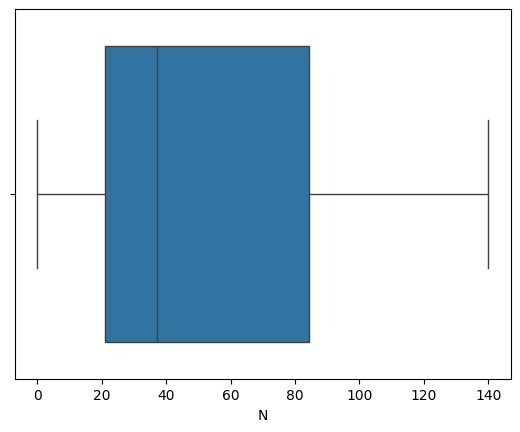

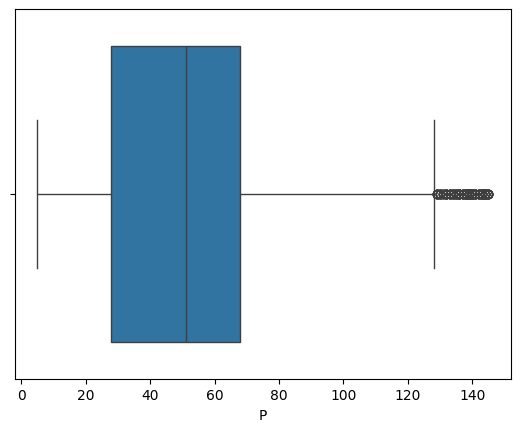

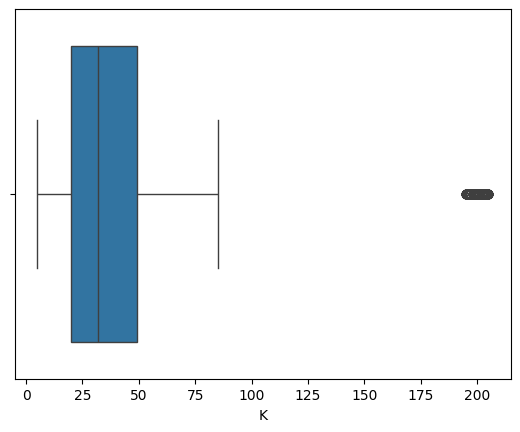

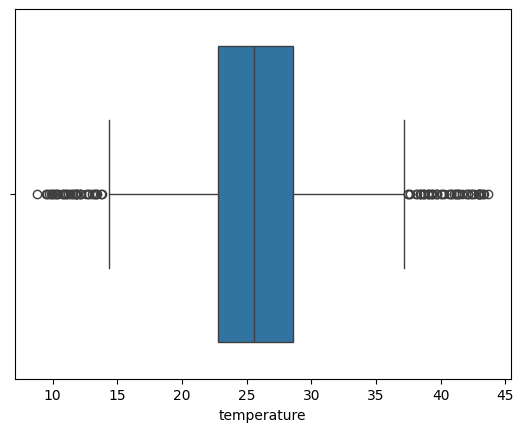

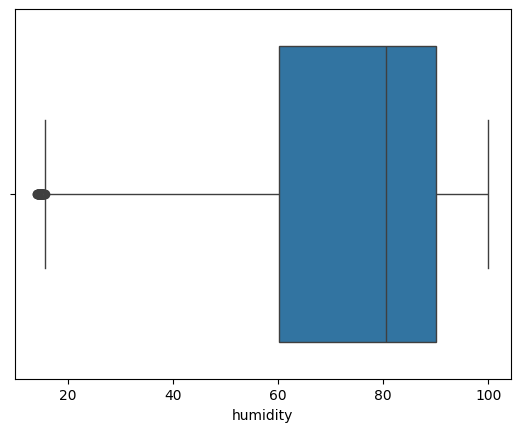

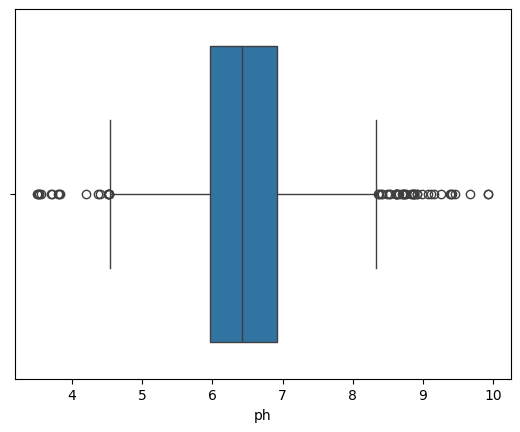

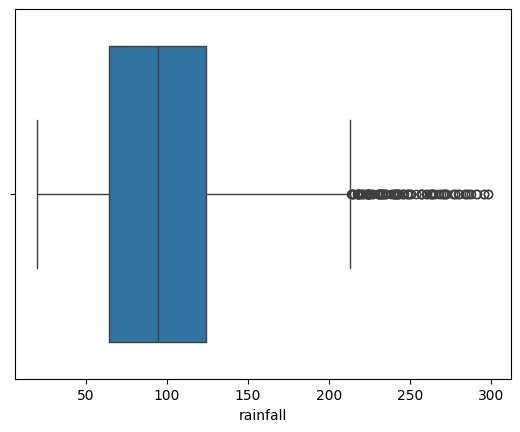

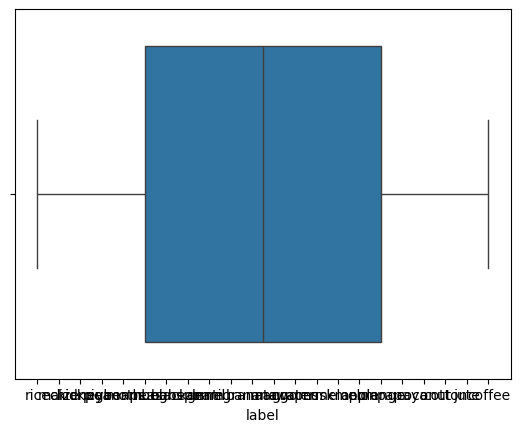

In [522]:
for fitur in land_df.keys():
  # Selain target dan Id
  if fitur=='quality' or fitur=='Id':
    continue
  sns.boxplot(x=land_df[fitur])
  plt.show()

In [523]:
numeric_df = land_df.select_dtypes(include=['number']) # Select only numerical columns
Q1 = numeric_df.quantile(0.25) # Calculate quantiles on the numerical DataFrame
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
land_df = land_df[~((land_df[numeric_df.columns] < (Q1 - 1.5 * IQR)) | (land_df[numeric_df.columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
# Cek ukuran dataset setelah kita drop outliers
land_df.shape

(1768, 8)

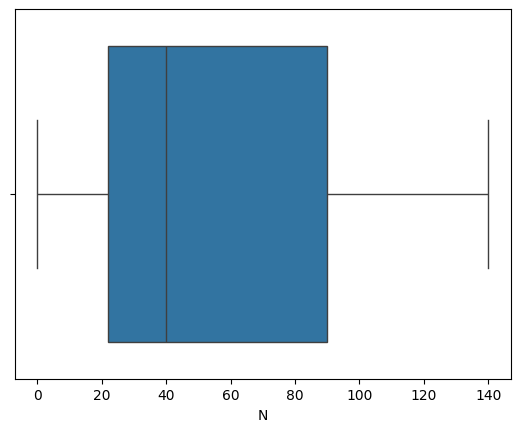

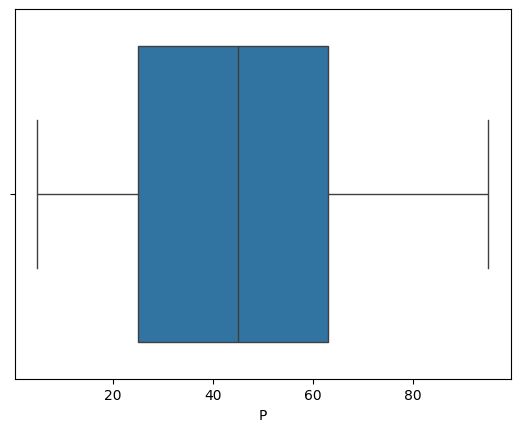

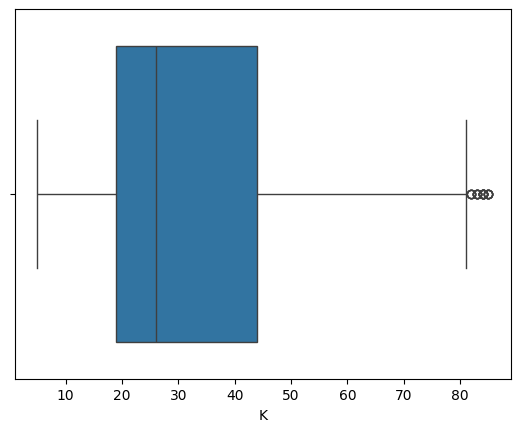

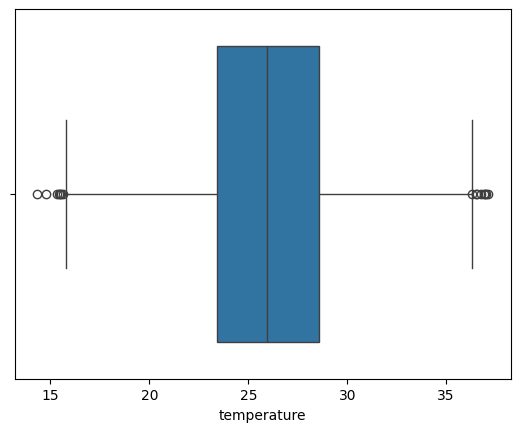

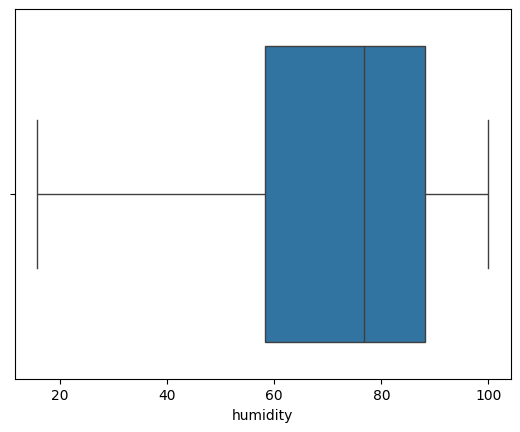

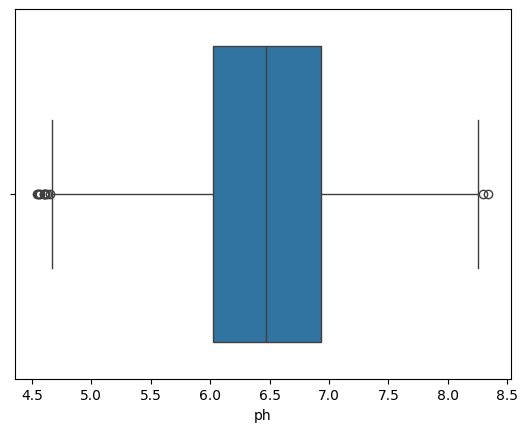

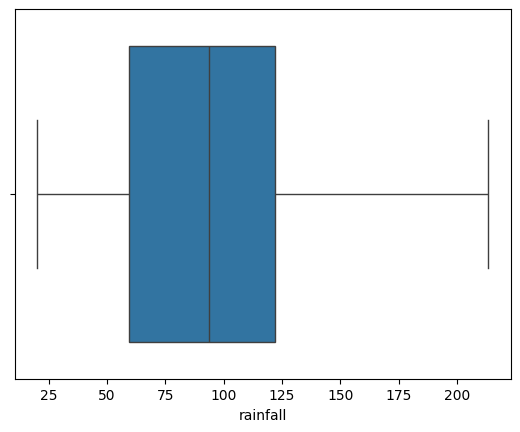

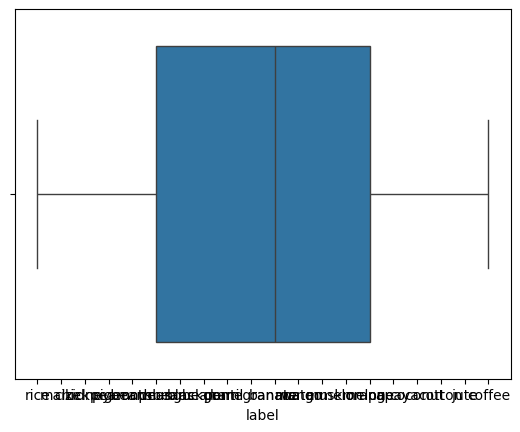

In [524]:

for fitur in land_df.keys():
  # Selain target dan Id
  if fitur=='quality' or fitur=='Id':
    continue
  sns.boxplot(x=land_df[fitur])
  plt.show()

####  <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight**: <br>Dari hasil deteksi ulang outlier dengan boxplot di atas, didapat bahwa outlier sudah berkurang setelah dibersihkan.</span></div>

## **Exploratory Data Analysis - Univariate Analysis**

###Explorasi atribut data numerical dan categorical

In [525]:
# membagi dataset menjadi 2 bagian yaitu kategorial dan numerik
categorical_features = ['label']
numerical_features = [
                      'N',
                      'P',
                      'K',
                      'temperature',
                      'humidity',
                      'ph',
                      'rainfall'
                      ]

### Sebaran/ distribusi data pada fitur target

Distribusi untuk kolom 'label':
             jumlah sampel  persentase
label                                 
banana                 100         5.7
lentil                 100         5.7
jute                   100         5.7
cotton                 100         5.7
muskmelon              100         5.7
watermelon             100         5.7
maize                  100         5.7
pomegranate            100         5.7
coffee                 100         5.7
blackgram              100         5.7
mungbean               100         5.7
pigeonpeas             100         5.7
kidneybeans            100         5.7
mango                   98         5.5
coconut                 85         4.8
orange                  83         4.7
mothbeans               58         3.3
chickpea                58         3.3
papaya                  54         3.1
rice                    32         1.8


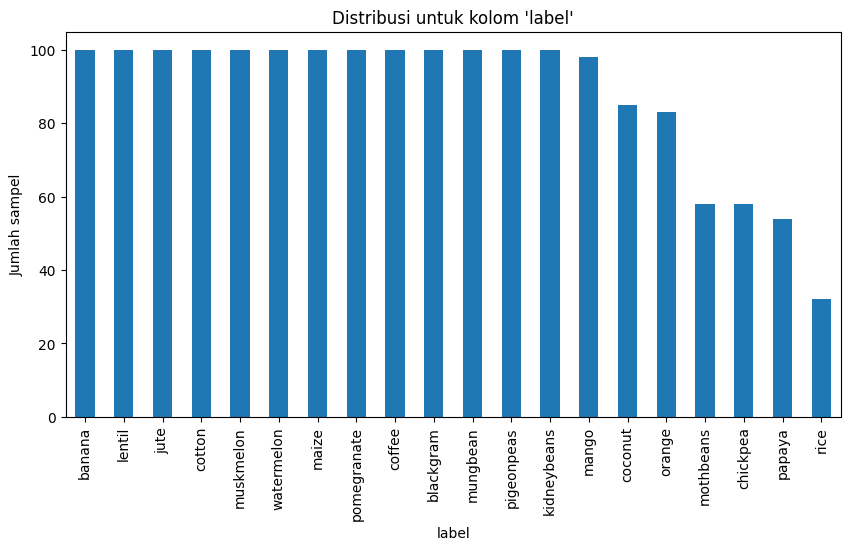

In [526]:
for feature in categorical_features:
    count = land_df[feature].value_counts()
    percent = 100 * land_df[feature].value_counts(normalize=True)
    data = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
    print(f"Distribusi untuk kolom '{feature}':")
    print(data)

    # Plot histogram untuk kolom saat ini
    land_df[feature].value_counts().plot(kind="bar", figsize=(10, 5))
    plt.title(f"Distribusi untuk kolom '{feature}'")
    plt.xlabel(feature)
    plt.ylabel("Jumlah sampel")
    plt.show()

####  <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight**: <br>Berdasarkan hasil visualisasi dari fitur target 'label' dapat memberikan informasi bahwa dataset sudah seimbang dengan jumlah sampel masing-masing label yaitu 100 sampel, sehingga tidak perlu menyeimbangkan data lagi.</span></div>

###Sebaran/ distribusi data pada setiap fitur numerik

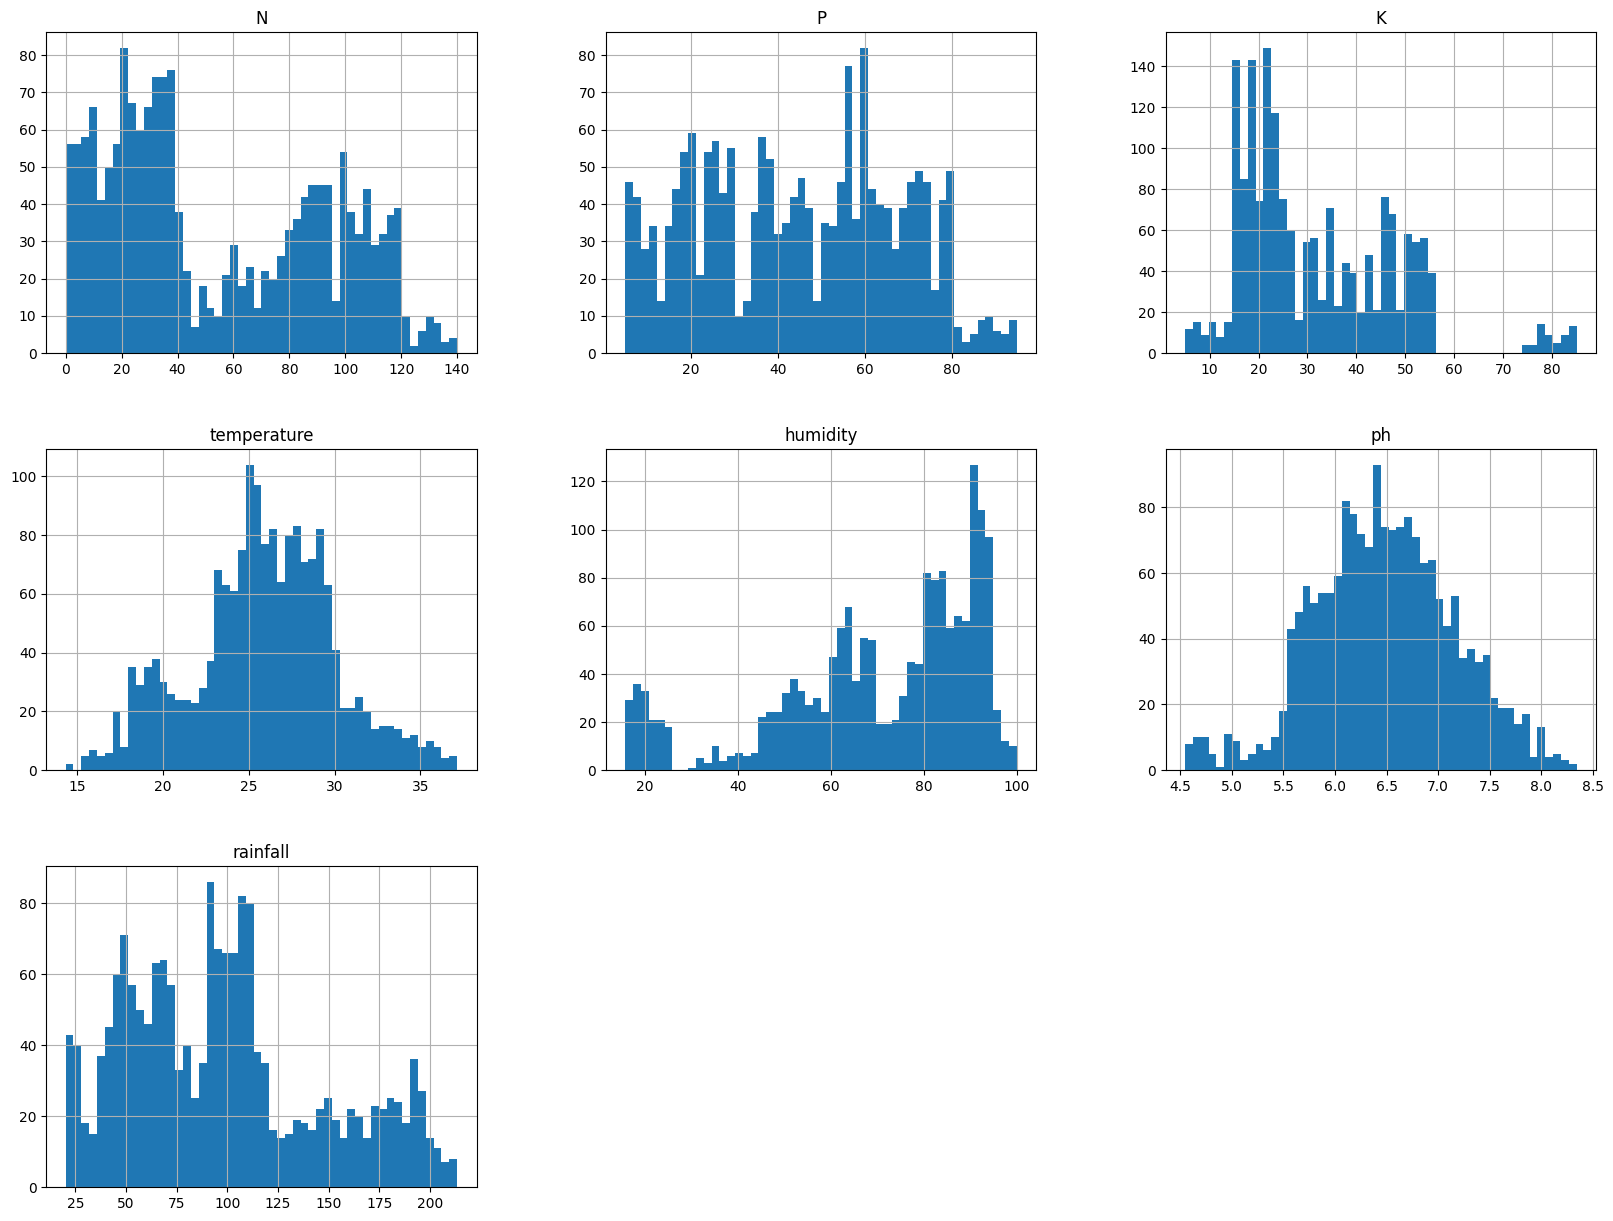

In [527]:
#visualisasi data masing-masing fitur menggunakan histogram plot untuk mengetahui sebaran/distribusi data pada setiap fitur
land_df.hist(bins=50, figsize=(20,15))
plt.show()

####  <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight**: <br>Berdasarkan hasil visualisasi data diatas, dapat terlihat sebaran atau distribusi data yang ada pada setiap fitur. Termasuk nilai minimum, median, maksimum, Q1, Q3, batas atas dan batas bawah. Selain itu dapat dilihat juga pada beberapa fitur masih terdapat nilai outliers.</span></div>

###Korelasi pada tiap kolom

##Exploratory Data Analysis - Multivariate Analysis

### Mengecek dan Membandingkan rata-rata N, P, K antar label

In [528]:
# Assuming dataset is a pandas DataFrame with columns 'N', 'P', 'K', 'label', etc.
crop_summary = land_df.groupby('label')[['N', 'P', 'K']].mean()

# Menghitung rata-rata kandungan N, P, dan K
average_N = land_df['N'].mean()
average_P = land_df['P'].mean()
average_K = land_df['K'].mean()

# Menampilkan hasil
print(f"Rata-rata Nitrogen (N): {average_N:.2f}%")
print(f"Rata-rata Fosfor (P): {average_P:.2f}%")
print(f"Rata-rata Kalium (K): {average_K:.2f}%")

# Membandingkan nilai rata-rata dengan setiap label
for label, data in crop_summary.iterrows():
    print(f"\nLabel: {label}")
    print(f"Kandungan Nitrogen (N): {data['N']:.2f}% (Rata-rata: {average_N:.2f}%)")
    print(f"Kandungan Fosfor (P): {data['P']:.2f}% (Rata-rata: {average_P:.2f}%)")
    print(f"Kandungan Kalium (K): {data['K']:.2f}% (Rata-rata: {average_K:.2f}%)")

Rata-rata Nitrogen (N): 54.33%
Rata-rata Fosfor (P): 44.85%
Rata-rata Kalium (K): 31.72%

Label: banana
Kandungan Nitrogen (N): 100.23% (Rata-rata: 54.33%)
Kandungan Fosfor (P): 82.01% (Rata-rata: 44.85%)
Kandungan Kalium (K): 50.05% (Rata-rata: 31.72%)

Label: blackgram
Kandungan Nitrogen (N): 40.02% (Rata-rata: 54.33%)
Kandungan Fosfor (P): 67.47% (Rata-rata: 44.85%)
Kandungan Kalium (K): 19.24% (Rata-rata: 31.72%)

Label: chickpea
Kandungan Nitrogen (N): 41.74% (Rata-rata: 54.33%)
Kandungan Fosfor (P): 68.45% (Rata-rata: 44.85%)
Kandungan Kalium (K): 80.14% (Rata-rata: 31.72%)

Label: coconut
Kandungan Nitrogen (N): 22.01% (Rata-rata: 54.33%)
Kandungan Fosfor (P): 16.96% (Rata-rata: 44.85%)
Kandungan Kalium (K): 30.49% (Rata-rata: 31.72%)

Label: coffee
Kandungan Nitrogen (N): 101.20% (Rata-rata: 54.33%)
Kandungan Fosfor (P): 28.74% (Rata-rata: 44.85%)
Kandungan Kalium (K): 29.94% (Rata-rata: 31.72%)

Label: cotton
Kandungan Nitrogen (N): 117.77% (Rata-rata: 54.33%)
Kandungan Fosfor

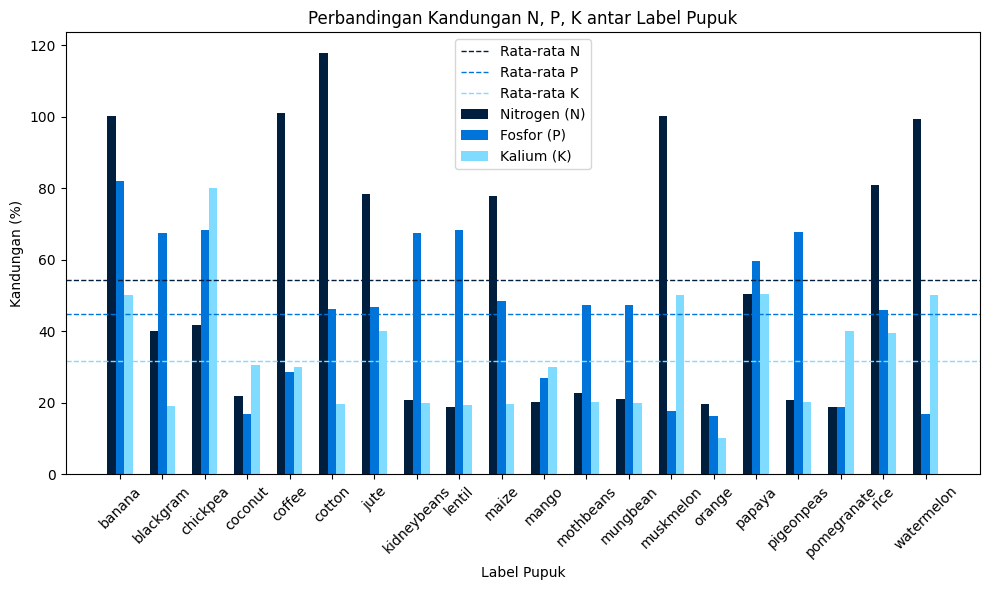

In [529]:
labels = crop_summary.index
N_values = crop_summary['N']
P_values = crop_summary['P']
K_values = crop_summary['K']

x = range(len(labels))

plt.figure(figsize=(10, 6))

# Menambahkan grafik batang dengan warna gradasi biru
plt.bar(x, N_values, width=0.2, label='Nitrogen (N)', align='center', color='#001f3f')  # Biru dongker
plt.bar([i + 0.2 for i in x], P_values, width=0.2, label='Fosfor (P)', align='center', color='#0074D9')  # Biru biasa
plt.bar([i + 0.4 for i in x], K_values, width=0.2, label='Kalium (K)', align='center', color='#7FDBFF')  # Biru muda

# Menambahkan garis rata-rata dengan warna sesuai
plt.axhline(average_N, color='#001f3f', linestyle='dashed', linewidth=1, label='Rata-rata N')
plt.axhline(average_P, color='#0074D9', linestyle='dashed', linewidth=1, label='Rata-rata P')
plt.axhline(average_K, color='#7FDBFF', linestyle='dashed', linewidth=1, label='Rata-rata K')

# Pengaturan sumbu dan label
plt.xlabel('Label Pupuk')
plt.ylabel('Kandungan (%)')
plt.title('Perbandingan Kandungan N, P, K antar Label Pupuk')
plt.xticks([i + 0.2 for i in x], labels, rotation=45)  # Menempatkan label di tengah batang
plt.legend()

plt.tight_layout()
plt.show()


####  <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Keterangan**: <br>Hasil visualisasi di atas memberikan informasi mengenai rata-rata kandungan N, P, K terhadap setiap label crop. Dimana dapat dilihat bahwa terdapat beberapa label crop yang membutuhkan lahan dengan kandungan N, P, K tinggi dan beberapa label membutuhkan lahan dengan kandungan N,P,K rendah.</span></div>

### Mengecek dan Membandingkan rata rata tingkat *temperature*, *humidity*, dan *rainfall* antar setiap label

In [530]:
# Mengelompokkan dan menghitung rata-rata untuk temperature, humidity, dan rainfall
climate_summary = land_df.groupby('label')[['temperature', 'humidity', 'rainfall']].mean()

# Menghitung rata-rata keseluruhan untuk temperature, humidity, dan rainfall
average_temperature = land_df['temperature'].mean()
average_humidity = land_df['humidity'].mean()
average_rainfall = land_df['rainfall'].mean()

# Menampilkan hasil rata-rata keseluruhan
print(f"Rata-rata Temperature: {average_temperature:.2f}°C")
print(f"Rata-rata Humidity: {average_humidity:.2f}%")
print(f"Rata-rata Rainfall: {average_rainfall:.2f} mm")

# Membandingkan nilai rata-rata dengan setiap label
for label, data in climate_summary.iterrows():
    print(f"\nLabel: {label}")
    print(f"Temperature: {data['temperature']:.2f}°C (Rata-rata: {average_temperature:.2f}°C)")
    print(f"Humidity: {data['humidity']:.2f}% (Rata-rata: {average_humidity:.2f}%)")
    print(f"Rainfall: {data['rainfall']:.2f} mm (Rata-rata: {average_rainfall:.2f} mm)")


Rata-rata Temperature: 25.84°C
Rata-rata Humidity: 70.11%
Rata-rata Rainfall: 98.00 mm

Label: banana
Temperature: 27.38°C (Rata-rata: 25.84°C)
Humidity: 80.36% (Rata-rata: 70.11%)
Rainfall: 104.63 mm (Rata-rata: 98.00 mm)

Label: blackgram
Temperature: 29.97°C (Rata-rata: 25.84°C)
Humidity: 65.12% (Rata-rata: 70.11%)
Rainfall: 67.88 mm (Rata-rata: 98.00 mm)

Label: chickpea
Temperature: 18.78°C (Rata-rata: 25.84°C)
Humidity: 17.60% (Rata-rata: 70.11%)
Rainfall: 79.43 mm (Rata-rata: 98.00 mm)

Label: coconut
Temperature: 27.37°C (Rata-rata: 25.84°C)
Humidity: 94.71% (Rata-rata: 70.11%)
Rainfall: 167.79 mm (Rata-rata: 98.00 mm)

Label: coffee
Temperature: 25.54°C (Rata-rata: 25.84°C)
Humidity: 58.87% (Rata-rata: 70.11%)
Rainfall: 158.07 mm (Rata-rata: 98.00 mm)

Label: cotton
Temperature: 23.99°C (Rata-rata: 25.84°C)
Humidity: 79.84% (Rata-rata: 70.11%)
Rainfall: 80.40 mm (Rata-rata: 98.00 mm)

Label: jute
Temperature: 24.96°C (Rata-rata: 25.84°C)
Humidity: 79.64% (Rata-rata: 70.11%)
Ra

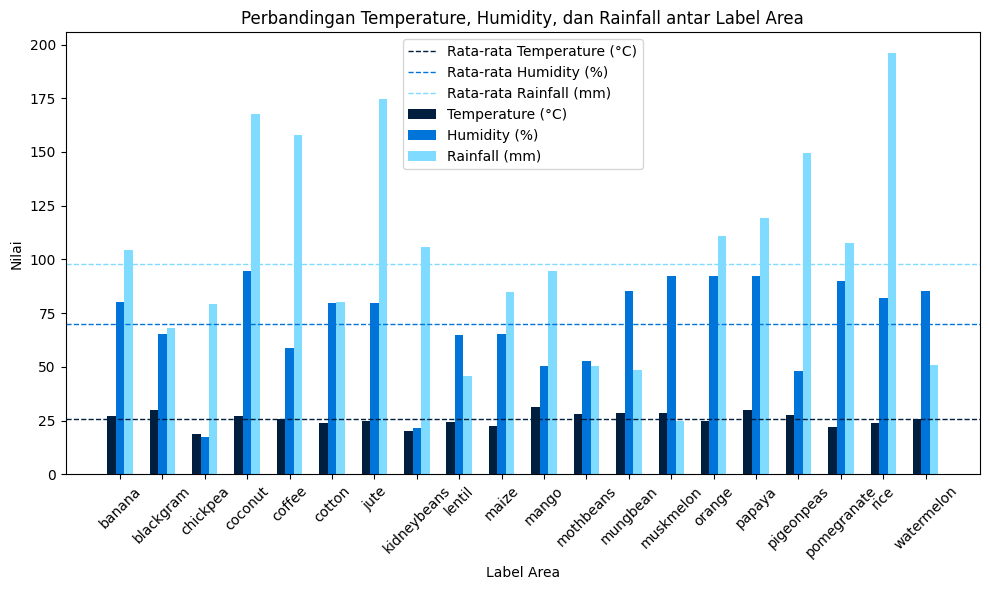

In [531]:
# Asumsi climate_summary sudah dihitung
labels = climate_summary.index
temperature_values = climate_summary['temperature']
humidity_values = climate_summary['humidity']
rainfall_values = climate_summary['rainfall']

x = range(len(labels))

plt.figure(figsize=(10, 6))

# Menambahkan grafik batang untuk temperature, humidity, dan rainfall dengan warna biru gradasi
plt.bar(x, temperature_values, width=0.2, label='Temperature (°C)', align='center', color='#001f3f')  # Biru dongker
plt.bar([i + 0.2 for i in x], humidity_values, width=0.2, label='Humidity (%)', color='#0074D9')  # Biru biasa
plt.bar([i + 0.4 for i in x], rainfall_values, width=0.2, label='Rainfall (mm)', color='#7FDBFF')  # Biru muda

# Menambahkan garis rata-rata untuk masing-masing parameter
plt.axhline(average_temperature, color='#001f3f', linestyle='dashed', linewidth=1, label='Rata-rata Temperature (°C)')
plt.axhline(average_humidity, color='#0074D9', linestyle='dashed', linewidth=1, label='Rata-rata Humidity (%)')
plt.axhline(average_rainfall, color='#7FDBFF', linestyle='dashed', linewidth=1, label='Rata-rata Rainfall (mm)')

# Pengaturan sumbu dan label
plt.xlabel('Label Area')
plt.ylabel('Nilai')
plt.title('Perbandingan Temperature, Humidity, dan Rainfall antar Label Area')
plt.xticks([i + 0.2 for i in x], labels, rotation=45)  # Menempatkan label di tengah batang
plt.legend()

plt.tight_layout()
plt.show()


####  <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Keterangan**: <br>Hasil visualisasi di atas memberikan informasi mengenai tingkat temperature, humidity, dan rainfall terhadap setiap label crop. Dimana dapat dilihat bahwa terdapat beberapa label crop yang membutuhkan lahan dengan tingkat temperature, humidity, dan rainfall tinggi dan beberapa label membutuhkan lahan dengan tingkat temperature, humidity dan rainfall rendah.</span></div>

###Korelasi antar fitur numerik

<Figure size 1900x1700 with 0 Axes>

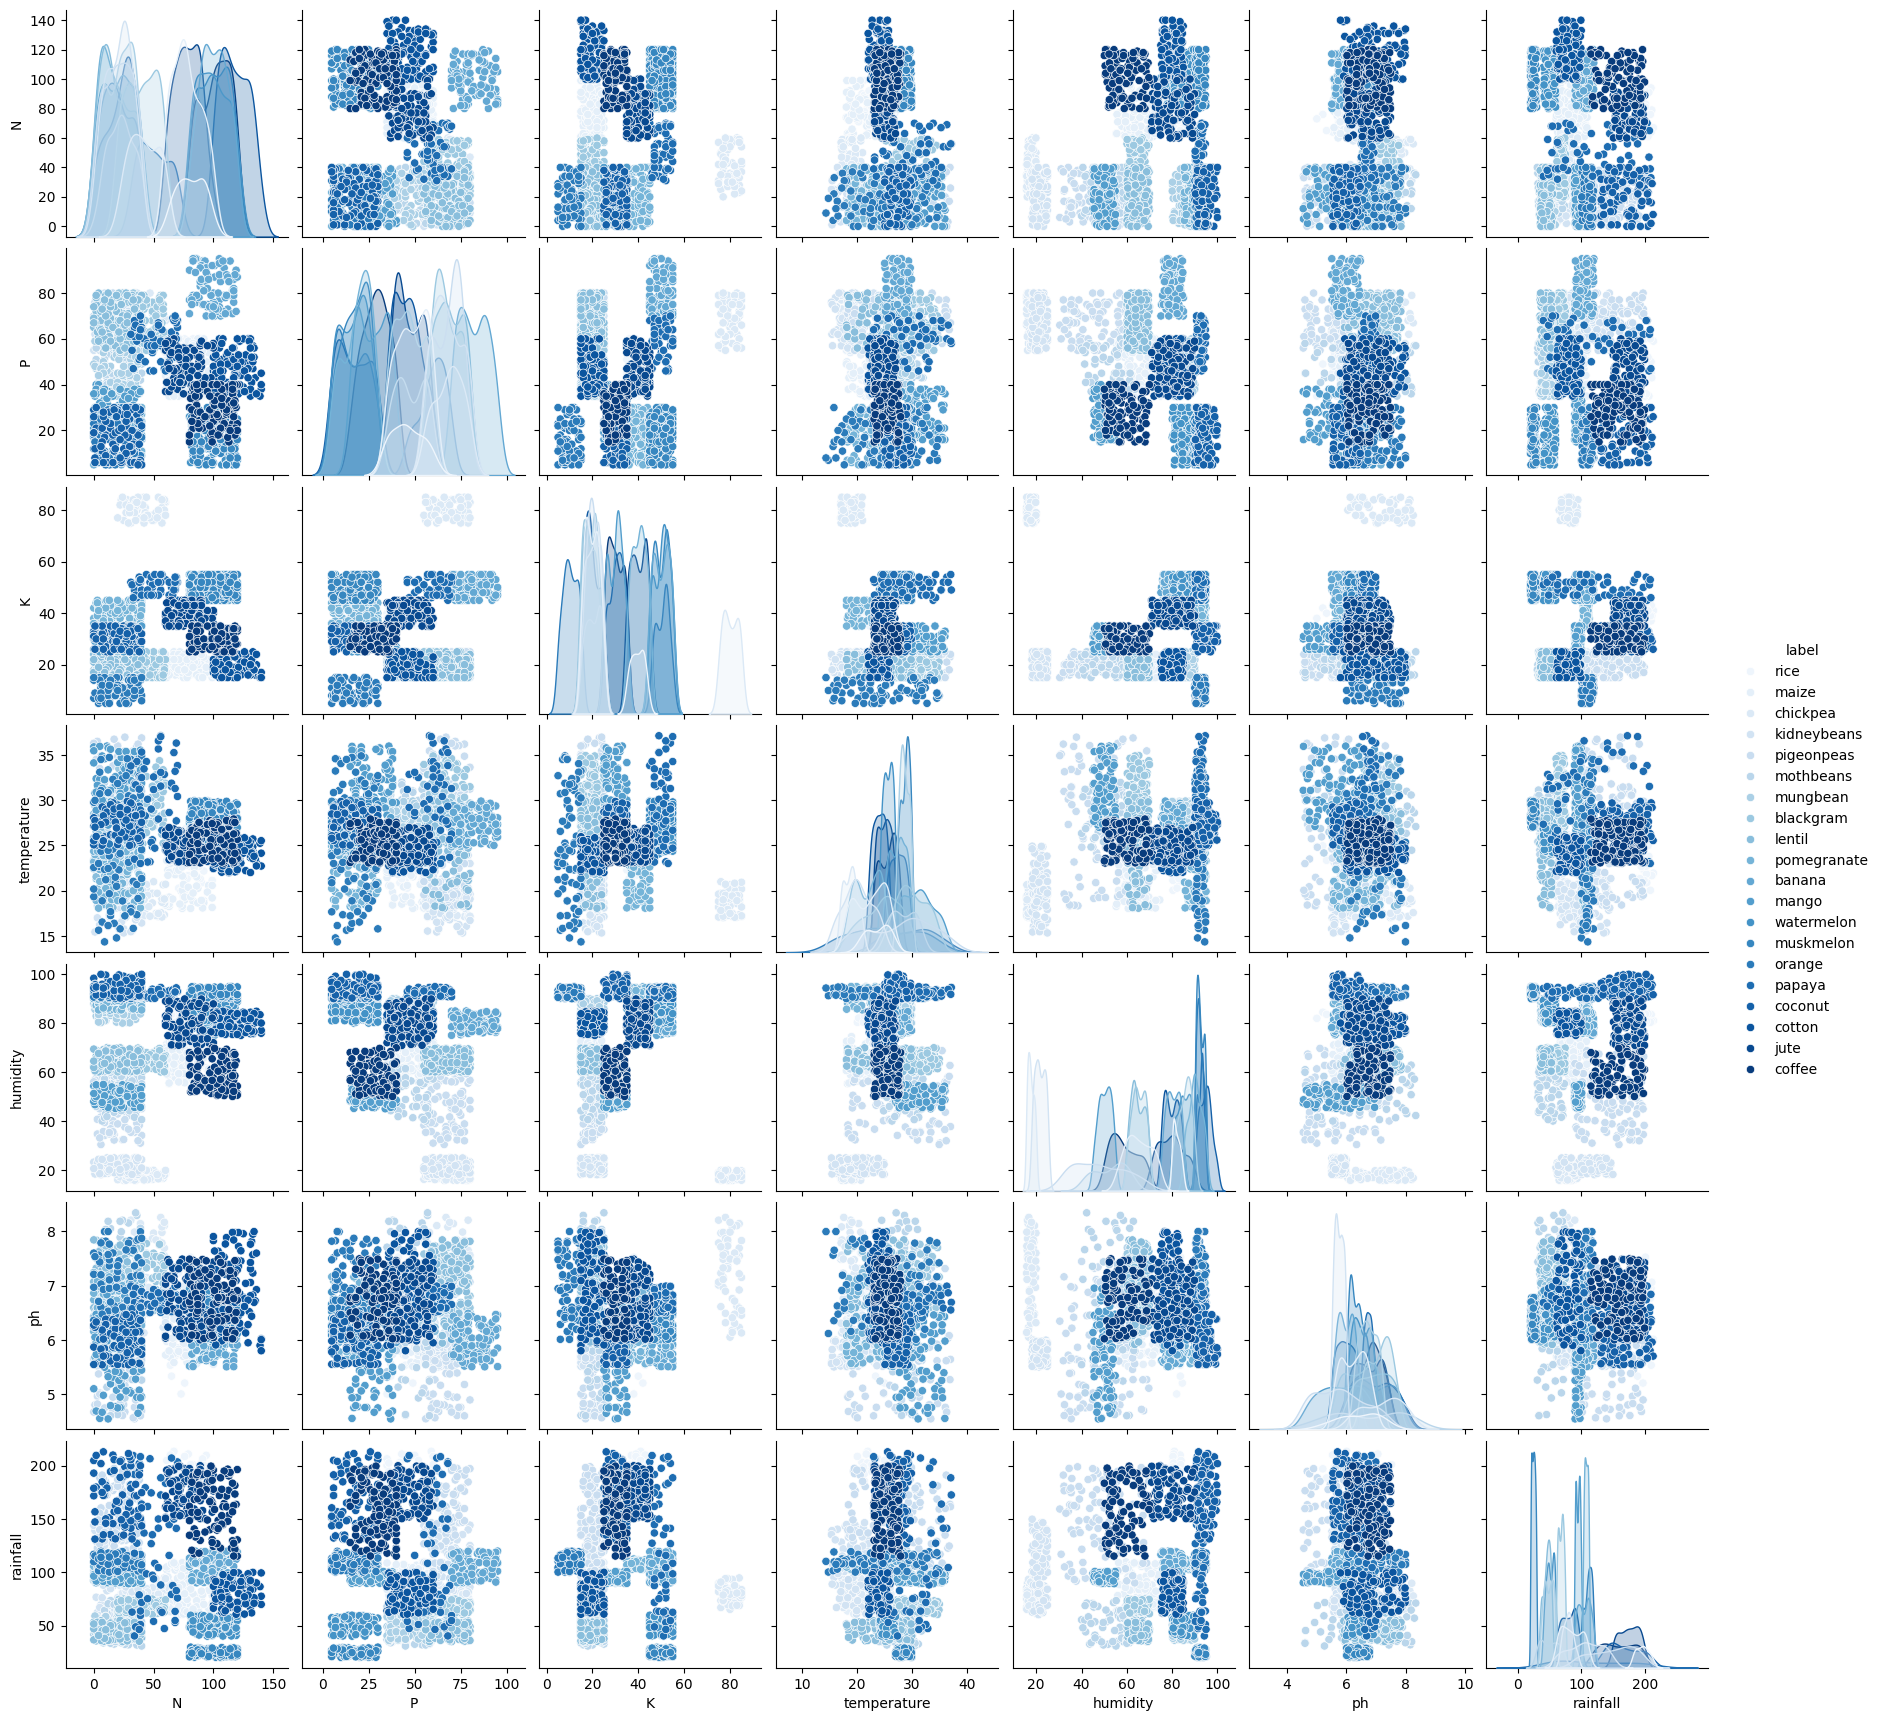

In [532]:
# korelasi antar fitur numerik menggunakan fungsi pairplot
plt.figure(figsize=(19,17))
sns.pairplot(land_df,hue='label', diag_kind='kde',palette='Blues')
plt.show()

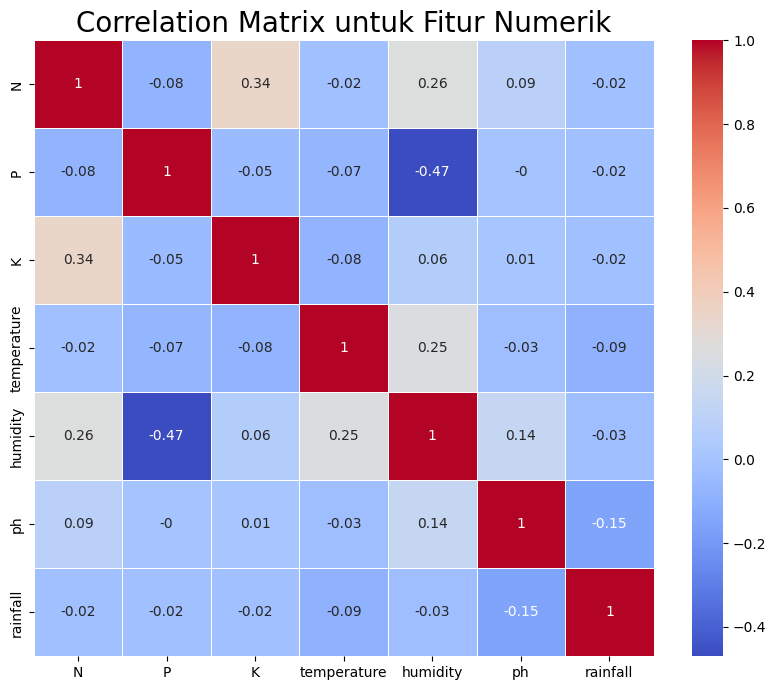

In [533]:
# Pilih hanya kolom numerik
numerical_df = land_df.select_dtypes(include=['number'])

# Hitung matriks korelasi
correlation_matrix = numerical_df.corr().round(2)

# Visualisasi heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik", size=20)
plt.show()

####  <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Keterangan**: <br><ul> <li><b>Korelasi Positif Kuat (mendekati 1):</b><br><ul><li><b>P (Fosfor) dan K (Kalium):</b> Memiliki korelasi positif yang sangat kuat (0.74). Ini menunjukkan hubungan linear yang signifikan. Kenaikan nilai P cenderung diikuti kenaikan nilai K, dan sebaliknya.</li><li><b>temperature (Suhu) dan humidity (Kelembaban):</b> Memiliki korelasi positif moderat (0.21). Ada kecenderungan perubahan searah, meski tidak terlalu kuat.</li> </ul></li><li><b>Korelasi Negatif Lemah (mendekati -1):</b><br> <ul><li><b>N (Nitrogen) dan P (Fosfor):</b> Memiliki korelasi negatif yang lemah (-0.23), menunjukkan sedikit kecenderungan berlawanan, tetapi tidak signifikan.</li></ul></li><li><b>Korelasi Sangat Lemah atau Tidak Ada Korelasi (mendekati 0):</b><br><ul><li>Sebagian besar pasangan fitur lainnya menunjukkan korelasi yang sangat lemah, menandakan tidak adanya hubungan linear yang signifikan. Contohnya, hubungan antara N dan *temperature* (0.03) atau antara pH dan *humidity* (-0.01).</li></ul></li><li><b>Implikasi Penting:</b> Korelasi yang kuat antara P dan K mengindikasikan potensi redundansi fitur. Dalam analisis atau pemodelan lebih lanjut, salah satu dari kedua fitur ini mungkin dapat dihilangkan tanpa kehilangan informasi yang signifikan.</li></ul></span></div>

#**Data Preparation**

###Reduksi dimensi dengan Principal Component Analysis (PCA)

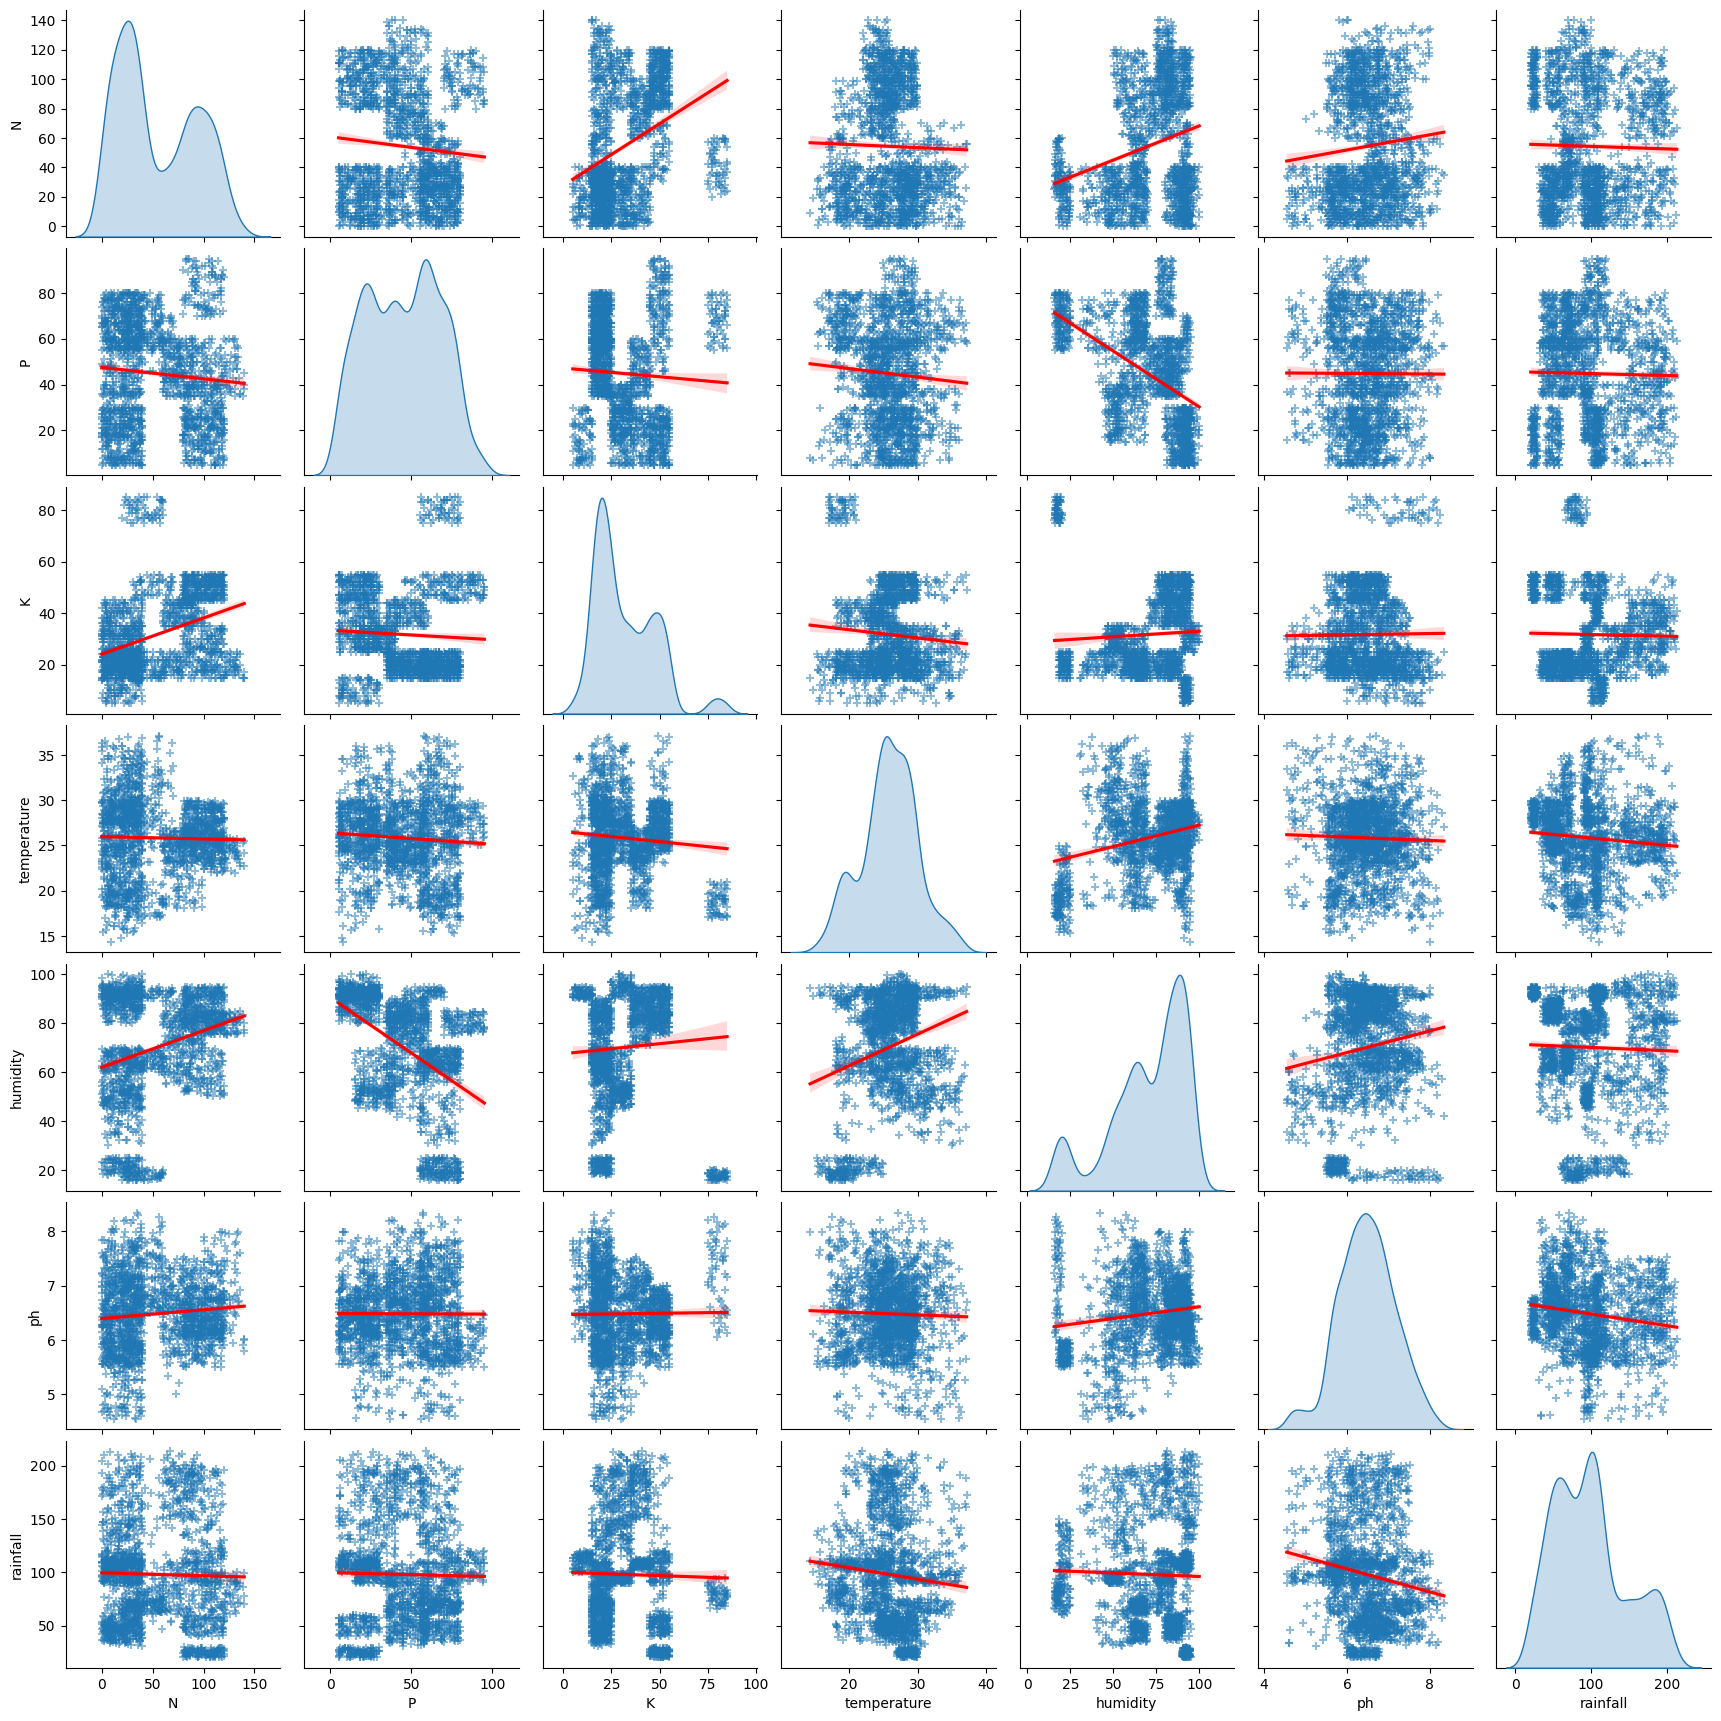

In [534]:
sns.pairplot(land_df.loc[:, land_df.columns != 'quality'],
             kind="reg",
             markers="+",
             diag_kind='kde',
             plot_kws={'line_kws': {'color':'red'},
                       'scatter_kws': {'alpha': 0.5}})

### Melakukan label encoding pada fitur target (label)

In [535]:
from sklearn.preprocessing import LabelEncoder

# Menggunakan LabelEncoder
label_encoder = LabelEncoder()
X = land_df[numerical_features]
y = label_encoder.fit_transform(land_df["label"])

# Membuat dictionary dari hasil transformasi yang valid
label_dict = {}
for i in set(y):  # Hanya iterasi pada nilai yang benar-benar ada
    label_dict[i] = label_encoder.inverse_transform([i])[0]

label_dict

{0: 'banana',
 1: 'blackgram',
 2: 'chickpea',
 3: 'coconut',
 4: 'coffee',
 5: 'cotton',
 6: 'jute',
 7: 'kidneybeans',
 8: 'lentil',
 9: 'maize',
 10: 'mango',
 11: 'mothbeans',
 12: 'mungbean',
 13: 'muskmelon',
 14: 'orange',
 15: 'papaya',
 16: 'pigeonpeas',
 17: 'pomegranate',
 18: 'rice',
 19: 'watermelon'}

####  <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Keterangan**: <br>Sebelum melangkah ke tahap pembagian dataset, dilakukan pemisahan antara variabel independen (N, P, K, suhu, kelembaban, pH, curah hujan) sebagai data X dan variabel dependen (label) sebagai data y. Mengingat fitur label pada dataset bersifat non-numerik (kategorikal), diterapkan teknik label encoding untuk mentransformasi data tersebut menjadi representasi numerik yang kompatibel dengan model.</span></div>

## Melakukan pembagian dataset

In [536]:
# melakukan pembagian data X dan y dengan train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 0)
print(f'Total jumlah sample pada dataset: {len(X)}')
print(f'Total jumlah sample pada train dataset: {len(X_train)}')
print(f'Total jumlah sample pada test dataset: {len(X_test)}')

Total jumlah sample pada dataset: 1768
Total jumlah sample pada train dataset: 1414
Total jumlah sample pada test dataset: 354


####  <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Keterangan**: <br>Untuk keperluan pelatihan dan pengujian model, dataset dibagi menjadi dua bagian. Sebanyak 80% data digunakan sebagai data latih, yang terdiri dari 1768 sampel, dan 20% sisanya digunakan sebagai data uji, yang terdiri dari 358 sampel.</span></div>

## Mengatasi outlier pada data train dengan metode LOF (*Local Outlier Factor*)

In [537]:
# mengatasi outlier fungsi LocalOutlierFactor
lof = LocalOutlierFactor().fit_predict(X_train)
mask = lof != -1
X_train, y_train = X_train[mask, :], y_train[mask]

In [538]:
X_train

array([[100.        ,  56.        ,  40.        , ...,  83.31240346,
          7.43331341, 176.1516409 ],
       [  4.        ,  59.        ,  19.        , ...,  67.62779652,
          7.62149457,  40.8106299 ],
       [ 14.        ,  48.        ,  21.        , ...,  84.80084105,
          6.99124236,  53.43228915],
       ...,
       [ 87.        ,  48.        ,  38.        , ...,  80.94023552,
          7.16186573, 190.312216  ],
       [ 57.        ,  67.        ,  25.        , ...,  66.61452812,
          7.55136432,  64.55882254],
       [ 19.        ,  72.        ,  15.        , ...,  69.76112921,
          6.89076012,  44.08562546]])

In [539]:
X_test

array([[ 91.        ,  21.        ,  26.        , ...,  57.36469955,
          7.26131369, 191.6549412 ],
       [ 12.        ,  66.        ,  20.        , ...,  63.41785982,
          7.33611722,  44.43177543],
       [  9.        ,  49.        ,  16.        , ...,  41.36561835,
          7.66153735,  55.053805  ],
       ...,
       [  4.        ,  40.        ,  26.        , ...,  48.56916221,
          6.72004179,  95.8445641 ],
       [ 16.        ,  29.        ,  13.        , ...,  93.67804556,
          6.19690794, 117.6236473 ],
       [  6.        ,  47.        ,  18.        , ...,  80.28038146,
          6.71527666,  40.16545979]])

####  <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Keterangan**: <br>Melalui proses standarisasi data, dipastikan bahwa seluruh nilai dari fitur-fitur numerik, baik pada data latih maupun data uji, telah ditransformasi ke dalam skala yang seragam.</span></div>

# **Model Development**

In [540]:
# Siapkan dataframe untuk analisis model
df_models = pd.DataFrame(index=['Train MSE', 'Test MSE'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

## K-Nearest Neighbor*

In [541]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsRegressor  # Import KNeighborsRegressor
from sklearn.metrics import mean_squared_error  # Import mean_squared_error

# Inisialisasi list_mse sebagai daftar kosong
list_mse = []

# Perulangan untuk mencoba nilai k dari 1 hingga 20
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)  # Inisialisasi model KNeighborsRegressor
    knn.fit(X_train, y_train)  # Melatih model
    y_prediction = knn.predict(X_test)  # Memprediksi nilai untuk data uji
    test_mse = mean_squared_error(y_test, y_prediction)  # Menghitung nilai MSE
    list_mse.append(test_mse)  # Menambahkan nilai MSE ke daftar
    print(f"Nilai MSE untuk k = {k} adalah : {test_mse}")


Nilai MSE untuk k = 1 adalah : 3.1977401129943503
Nilai MSE untuk k = 2 adalah : 2.5430790960451977
Nilai MSE untuk k = 3 adalah : 2.529817953546767
Nilai MSE untuk k = 4 adalah : 2.720515536723164
Nilai MSE untuk k = 5 adalah : 2.4889265536723166
Nilai MSE untuk k = 6 adalah : 2.2395637162586315
Nilai MSE untuk k = 7 adalah : 2.0066874207310046
Nilai MSE untuk k = 8 adalah : 2.1038135593220337
Nilai MSE untuk k = 9 adalah : 2.2276975657389966
Nilai MSE untuk k = 10 adalah : 2.2295197740112993
Nilai MSE untuk k = 11 adalah : 2.2834664051921374
Nilai MSE untuk k = 12 adalah : 2.3862798179535467
Nilai MSE untuk k = 13 adalah : 2.3549794403770936
Nilai MSE untuk k = 14 adalah : 2.4388619854721547
Nilai MSE untuk k = 15 adalah : 2.5760075329566856
Nilai MSE untuk k = 16 adalah : 2.647907838983051
Nilai MSE untuk k = 17 adalah : 2.7333978456786503
Nilai MSE untuk k = 18 adalah : 2.734349933737881
Nilai MSE untuk k = 19 adalah : 2.782681503043962
Nilai MSE untuk k = 20 adalah : 2.90066384180

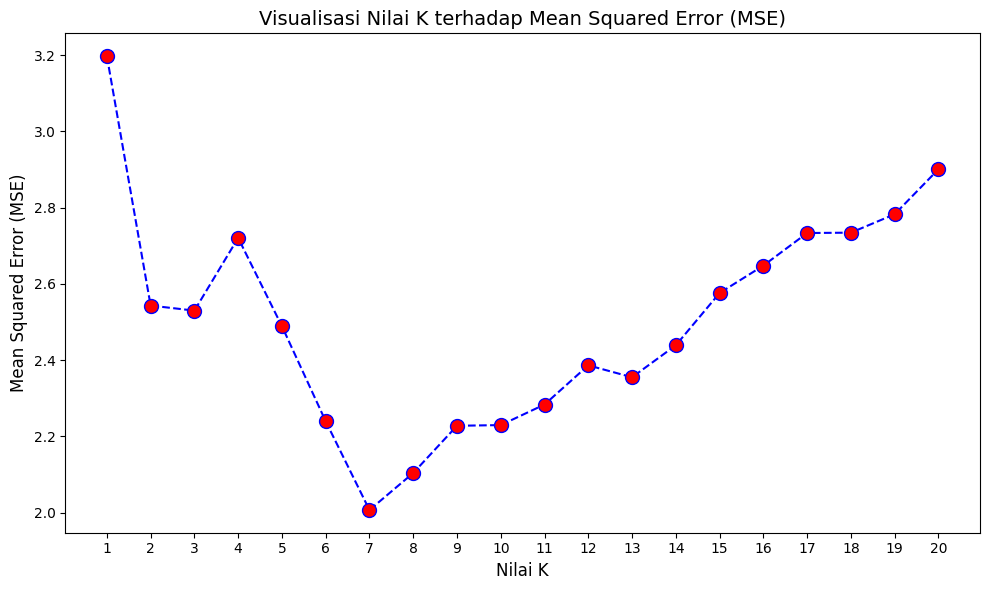

In [542]:
# Visualisasi hubungan Nilai K terhadap MSE
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), list_mse, color='blue', marker='o', linestyle='dashed',
         markerfacecolor='red', markersize=10)
plt.title('Visualisasi Nilai K terhadap Mean Squared Error (MSE)', fontsize=14)
plt.xlabel('Nilai K', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.xticks(range(1, 21))  # Pastikan sumbu x hanya memiliki nilai dari 1 sampai 20
plt.tight_layout()
plt.show()


In [543]:
# didapatkan nilai k optimal adalah 1
print("Minimum error:-",min(error_rate)," pada K =",error_rate.index(min(error_rate))+1)

Minimum error:- 2.0066874207310046  pada K = 7


In [544]:

KNN = KNeighborsRegressor(n_neighbors=7)
KNN.fit(X_train, y_train)
df_models.loc['Train MSE', 'KNN'] = mean_squared_error(
    y_pred=KNN.predict(X_train),
    y_true=y_train)

In [545]:
# Inisialisasi dan latih model klasifikasi KNN
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # Ubah ke classifier
knn_classifier.fit(X_train, y_train)

# Prediksi data test
knn_predictions = knn_classifier.predict(X_test)

# Menghasilkan classification report
knn_report = classification_report(y_test, knn_predictions, output_dict=True, target_names=label_encoder.classes_)
report_df = pd.DataFrame(knn_report).transpose()
print(report_df)

              precision    recall  f1-score     support
banana         1.000000  1.000000  1.000000   16.000000
blackgram      0.958333  1.000000  0.978723   23.000000
chickpea       1.000000  1.000000  1.000000   11.000000
coconut        1.000000  1.000000  1.000000   16.000000
coffee         1.000000  1.000000  1.000000   17.000000
cotton         0.952381  1.000000  0.975610   20.000000
jute           0.772727  0.944444  0.850000   18.000000
kidneybeans    1.000000  1.000000  1.000000   23.000000
lentil         0.954545  1.000000  0.976744   21.000000
maize          1.000000  0.950000  0.974359   20.000000
mango          1.000000  1.000000  1.000000   20.000000
mothbeans      1.000000  0.900000  0.947368   10.000000
mungbean       1.000000  1.000000  1.000000   27.000000
muskmelon      1.000000  1.000000  1.000000   19.000000
orange         1.000000  1.000000  1.000000   19.000000
papaya         1.000000  1.000000  1.000000   11.000000
pigeonpeas     1.000000  0.937500  0.967742   16

####  <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight**: <br>Dari kode di atas dapat dilihat bahwa model dengan algoritma K-Nearest Neighbor memperoleh nilai akurasi yaitu sebesar 2.0066874207310046 dengan k = 7.</span></div>

#Random Forest

In [546]:
# Membuat model Random Forest untuk klasifikasi
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model
model.fit(X_train, y_train)

# Prediksi menggunakan model
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9971751412429378


In [547]:
# Inisialisasi dan latih model Random Forest
rf_classifier = RandomForestClassifier(random_state=18)  # Anda bisa menambahkan hyperparameter lain sesuai kebutuhan
rf_classifier.fit(X_train, y_train)

# Prediksi data test
rf_predictions = rf_classifier.predict(X_test)

# Menghasilkan classification report
rf_report = classification_report(y_test, rf_predictions, output_dict=True, target_names=label_encoder.classes_)
report_df = pd.DataFrame(rf_report).transpose()

# Menampilkan classification report dalam bentuk dataframe
print(report_df)

              precision    recall  f1-score     support
banana         1.000000  1.000000  1.000000   16.000000
blackgram      1.000000  1.000000  1.000000   23.000000
chickpea       1.000000  1.000000  1.000000   11.000000
coconut        1.000000  1.000000  1.000000   16.000000
coffee         1.000000  1.000000  1.000000   17.000000
cotton         1.000000  1.000000  1.000000   20.000000
jute           0.947368  1.000000  0.972973   18.000000
kidneybeans    1.000000  1.000000  1.000000   23.000000
lentil         1.000000  1.000000  1.000000   21.000000
maize          1.000000  1.000000  1.000000   20.000000
mango          1.000000  1.000000  1.000000   20.000000
mothbeans      1.000000  1.000000  1.000000   10.000000
mungbean       1.000000  1.000000  1.000000   27.000000
muskmelon      1.000000  1.000000  1.000000   19.000000
orange         1.000000  1.000000  1.000000   19.000000
papaya         1.000000  1.000000  1.000000   11.000000
pigeonpeas     1.000000  1.000000  1.000000   16

In [548]:
RF = RandomForestRegressor(n_estimators=30, max_depth=16)
RF.fit(X_train, y_train)

df_models.loc['Train MSE', 'RandomForest'] = mean_squared_error(
    y_pred=RF.predict(X_train),
    y_true=y_train)

####  <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight**: <br>Dari kode di atas dapat dilihat bahwa model dengan algoritma Random Forest memperoleh nilai akurasi yaitu sebesar 0.9971751412429378.</span></div>

# **XGBoost Algorithm**

In [549]:
# Membuat model XGBoost untuk klasifikasi
# model = xgb.XGBClassifier(objective ='multi:softmax', num_class=3)
model = XGBClassifier(objective ='multi:softmax', num_class=3)

# Melatih model
model.fit(X_train, y_train)

# Prediksi menggunakan model
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9745762711864406


In [550]:
# Prediksi menggunakan data test
y_pred = model.predict(X_test)

# Menghasilkan classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Menampilkan classification report dalam bentuk DataFrame
report_df = pd.DataFrame(report).transpose()
print(report_df)

              precision    recall  f1-score     support
0              1.000000  1.000000  1.000000   16.000000
1              1.000000  1.000000  1.000000   23.000000
2              1.000000  1.000000  1.000000   11.000000
3              1.000000  1.000000  1.000000   16.000000
4              1.000000  1.000000  1.000000   17.000000
5              1.000000  1.000000  1.000000   20.000000
6              0.888889  0.888889  0.888889   18.000000
7              1.000000  0.869565  0.930233   23.000000
8              1.000000  0.952381  0.975610   21.000000
9              0.952381  1.000000  0.975610   20.000000
10             1.000000  1.000000  1.000000   20.000000
11             0.909091  1.000000  0.952381   10.000000
12             1.000000  1.000000  1.000000   27.000000
13             1.000000  1.000000  1.000000   19.000000
14             1.000000  1.000000  1.000000   19.000000
15             1.000000  1.000000  1.000000   11.000000
16             0.833333  0.937500  0.882353   16

In [551]:
from sklearn.ensemble import AdaBoostRegressor
boosting = AdaBoostRegressor(n_estimators=90, learning_rate=0.2)
boosting.fit(X_train, y_train)

df_models.loc['Train MSE', 'Boosting'] = mean_squared_error(
    y_pred=boosting.predict(X_train),
    y_true=y_train)


####  <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight**: <br>Dari kode di atas dapat dilihat bahwa model dengan algoritma XGBoost memperoleh nilai akurasi yaitu sebesar 0.9745762711864406.</span></div>

#**Evaluasi Model**

Mengevaluasi model-model tersebut menggunakan data uji dan metrik yang digunakan dalam kasus ini yaitu mean_squared_error. Hasil evaluasi kemudian kita simpan ke dalam df_models.

In [552]:
for name, model in {'KNN': KNN, 'RandomForest': RF, 'Boosting': boosting}.items():
  df_models.loc['Test MSE', name] = mean_squared_error(
      y_pred=model.predict(X_test),
      y_true=y_test)

# Mengecek evaluasi model
display(df_models)

KNN RandomForest  Boosting
Train MSE  1.374831       0.1907  9.328909
Test MSE   2.006687     1.298158  9.699751

 Plot hasil evaluasi model dengan bar chart.

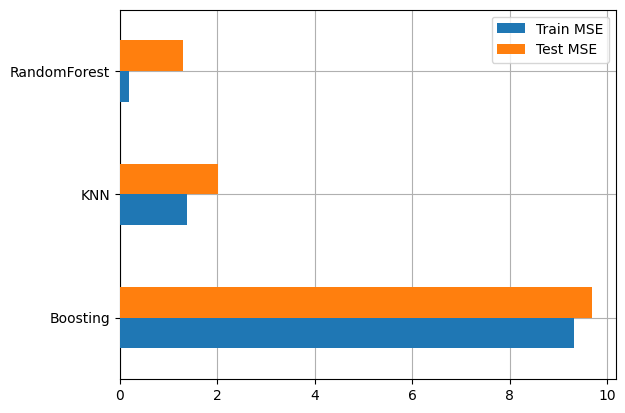

In [553]:
fig, ax = plt.subplots()
df_models.T.sort_values(by='Test MSE', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

####  <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight**: <br>Dari gambar di atas, terlihat bahwa, model RandomForest memberikan nilai eror (MSE) yang paling kecil. Sedangkan model algoritma Boosting memiliki eror yang paling besar. Sebelum memutuskan model terbaik untuk melakukan prediksi Quality. Mari kita coba uji prediksi menggunakan beberapa sampel acak (5) pada data uji..</span></div>

In [554]:
X_test_df = pd.DataFrame(X_test)
X_sample = X_test_df.sample(5)
dict_result = {
    'index_sample': [],
    'y_true': [],
    'prediksi_KNN': [],
    'prediksi_RF': [],
    'prediksi_Boosting': []
}

# X_sample = X_test.sample(5)
dict_result['index_sample'] = X_sample.index.values
dict_result['y_true'] = [y_test[idx] for idx in dict_result['index_sample']]

for name, model in {'KNN': KNN, 'RF': RF, 'Boosting': boosting}.items():
  dict_result['prediksi_' + name] = model.predict(X_sample)

display(pd.DataFrame(dict_result).set_index('index_sample'))

y_true  prediksi_KNN  prediksi_RF  prediksi_Boosting
index_sample                                                      
241               11      8.142857     9.100000           6.634361
228               12     12.000000    12.000000          11.027174
335                5      5.000000     5.000000           7.515152
352               14     14.000000    13.733333          11.129719
201                3      3.000000     3.000000           7.577099

####  <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight**: <br>algoritma KNN adalah yang paling mendekati nilai sebenarnya untuk data-data yang ditampilkan.</span></div>

## Perbandingan metriks akurasi antar model

In [555]:
#menghitung nilai akurasi, precision dan recall setiap model
knn_accuracy = round((accuracy_score(y_test, knn_predictions)*100), 2)
rf_accuracy = round((accuracy_score(y_test, rf_predictions)*100), 2)
xgb_accuracy = round((accuracy_score(y_test, xgb_predictions)*100), 2)

knn_precision = round((precision_score(y_test, knn_predictions, average='macro')*100), 2)
rf_precision = round((precision_score(y_test, rf_predictions, average='macro')*100), 2)
xgb_precision = round((precision_score(y_test, xgb_predictions, average='macro')*100), 2)

knn_recall = round((recall_score(y_test, knn_predictions, average='macro')*100), 2)
rf_recall = round((recall_score(y_test, rf_predictions, average='macro')*100), 2)
xgb_recall = round((recall_score(y_test, xgb_predictions, average='macro')*100), 2)

In [556]:
# membat dataframe hasil evaluasi
list_evaluasi= [[knn_accuracy, knn_precision, knn_recall],
                [rf_accuracy, rf_precision, rf_recall],
            [xgb_accuracy, xgb_precision, xgb_recall],]
evaluasi = pd.DataFrame(list_evaluasi,
                        columns=['Accuracy (%)', 'Precision (%)', 'Recall (%)'],
                        index=['K-Nearest Neighbor','Random Forest','XGBoost'])
evaluasi

Accuracy (%)  Precision (%)  Recall (%)
K-Nearest Neighbor         97.46          97.19       95.88
Random Forest              99.72          99.74       99.44
XGBoost                    97.46          96.81       97.13

####  <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight**: <br>Dari hasil evaluasi di atas dapat memberikan informasi bahwa ketiga model yang dibangun memiliki performa di atas 95%. Dimana dapat dilihat juga bahwa model dengan algoritma Random Forest memiliki performa (nilai akurasi, precision, dan recall) yang lebih baik dari dua model lainnya yaitu model dengan algoritma K-Nearest Neighbor dan XGBoost.</span></div>

#Kesimpulan

Berdasarkan hasil evaluasi model di atas, dapat disimpulkan bahwa model terbaik untuk melakukan rediksi Pemilihan Jenis Tanaman untuk Lahan Pertanian adalah  model Random Forest dapat dianggap sebagai model terbaik untuk digunakan dalam kasus ini